---
title: "Sales Data Analysis Report"
author: "Pham Quang Huy"
date: "2024-10-31"
# format: pdf
format:
    html: 
        code-fold: True
jupyter: python3
---

# Sales Data Analysis Report

## 1. Introduction

My individual reports keeps track the instruction video of ["Solving real world data science tasks with Python Pandas!"](https://github.com/KeithGalli/Pandas-Data-Science-Tasks.git) by [Keith Galli](https://youtu.be/eMOA1pPVUc4?si=-UXWLdSFktCLWSh5). Through power of [Quarto](https://quarto.org/docs/visual-editor/vscode/), I demonstrate the final work of a story telling report to show practices and engage to the audience in a seamless way.

In this 'Data Sale Analysis', I use the basics understand from light exploratory data skills in data science practices (implemented Python Pandas and Matlotlib) to complete the walk through instruction in one Jupyter notebook file. The purpose is to get acquainted with **multiple files** of records by months (*./Sales_Data*) and integrating them in one **.csv** file. By learning based on doing, I use my critical thinking and design a notebook to represent the significant insights while providing data visualization to make impacts to the electric stores business.

## 2. Data Overview

In the competitive world of retail, data holds the key to understanding customer demands and optimizing sales strategies. A lot of information from data are critical for business decision-making such as trends of sales through periods of time, significant selling programs on specific products.

The data nature witness the reverse relation between the 'Sale Quantity' and 'Price Each', which makes the market consumer more items like accessories rather than huge investment like laptops, electrics households. The relations of low-price product to their large proportion sales amount suggests the demonstration methods by comparing average price.

[Figure 1: Subplot of price each item over the quantity of products in total](/Output/PriceQuantityComparision.png){fig-alt="Bar chart showing the number of orders per product with an overlaid line plot of the average price for each product. The green bars represent the quantity ordered, while the blue line indicates the average price in dollars. This visualization helps identify popular items and their price points, showing that lower-priced items like batteries have higher sales volumes, whereas premium products like MacBook Pro have fewer orders."}

There are exceptions in this chart is the office products like MacBook Pro and ThinkPad, which reasonably explains the other impacts of customer demands or the investment cycle into new products. The example of uncover insights from sales data inspired by Keith Galli's tutorial is essentials of uncovering insights including peak periods, best-selling products, and potential strategies to optimize sales.

### a/ Data Description

The data sources depict set of data in 12 months of electrical stores named "Keith's SuperDuper cool electronics". The folder 'data' includes 12 separated `.csv` files for which present the sales data at different stores in a month in that year.

### b/ Data Loading

In the video, the initial data integration created a one unified `.csv` file containing 12 sales data collections by various months in a year. The merging data from each month in sales data implements read files end with `.csv`. The reason was provided by the author/youtuber is to create an independent place have abundant data for analyzing in details.

One more important practice is to `import` very handling libraries.

In [1]:
import os
import pandas as pd
import numpy as np

path = "./Sales_Data"
files = [file for file in os.listdir(path) if file.endswith('.csv')]

all_data = pd.DataFrame()

for file in files:
    file_read = pd.read_csv(path + "/" + file)
    all_data = pd.concat([all_data, file_read])

all_data.to_csv("all_data.csv", index=False)

## 3. Exploratory Data Analysis and Insights

`all_data.csv` save amount of 12 files data set is now assigned to variable `df`. From this steps, all methods of exploration date (e.g. `.describe()`, `.info()`, ...) are implemented with following intepretation.

In [2]:
df = pd.read_csv("all_data.csv")
df.info()
df.describe()
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 8.6+ MB
Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64


Data Frame (`df`) used for analysis compounds of 6 columns. The `Order Date` column present date and time. This data columns could help define the months for computation other combination of quantitative information. The 'Product' column contains existing name products ordered per purchase, which could be counted as sum methods to gather attribute of `Price Each`, `Quantity`.

`Purchase Address` indicates delivery good destination. The integration of details show city, state, geographical identification. One the quote of purchase is recorded, the column `Order ID` assigned one code for the buyer order. In video, Keith has implemented the data count distinct for each `Order ID` to get the combination of good come together.

| Column Name | Description |
|-----------------|-------------------------------------------------------|
| `Order Date` | Represents the date and time of each order. Useful for extracting information like month, day, and hour. |
| `Product` | Contains the name of products ordered per purchase, allowing for counts and summaries of each product. |
| `Quantity Ordered` | Shows the quantity of each product ordered, used to compute total quantities and sales per product. |
| `Price Each` | Indicates the price of each product at the time of purchase, used for calculating total sales. |
| `Purchase Address` | Specifies the delivery address, including city, state, and other geographical identifiers. Useful for analyzing sales distribution by location. |
| `Order ID` | Unique identifier assigned to each order, which allows counting distinct orders and analyzing product combinations bought together. |

### a/ Preprocessing Data

The data summary from the primary data interpretation shows no missing data from the six columns including **04 categorical data** (OrderID, Product, Order Date, Purchase Address), **02 numerical data** (Quantity Ordered, Price Each). Otherwise, the nulls values present all over 6 columns and takes small proportion of values (**0.2%**).

The priority is to find rows of NAN values rows and watch over all numeric data columns. The visualization shows below.

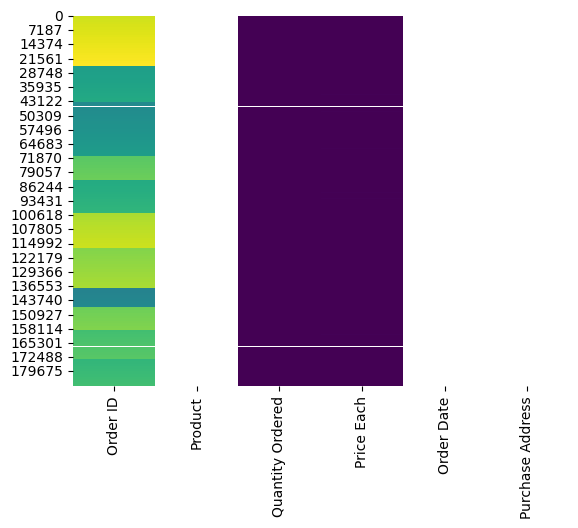

In [4]:
## Visualize missing values

import seaborn as sns

if df.isnull().values.any(): 
    numeric_df = df.apply(pd.to_numeric, errors='coerce')
    sns.heatmap(numeric_df[numeric_df.isnull().any(axis=1)], cbar=False, cmap='viridis')
else:
    print("No missing values to visualize.")

*Figure 2: Heatmap Visualizing Missing Values in Dataset*

In [5]:
null_data = df[df.isnull().any(axis=1)]
null_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
264,NaN,NaN,NaN,NaN,NaN,NaN
648,NaN,NaN,NaN,NaN,NaN,NaN
680,NaN,NaN,NaN,NaN,NaN,NaN
1385,NaN,NaN,NaN,NaN,NaN,NaN
1495,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# Remove rows with text in 'Order Date'
df = df[df['Order Date'].str[0:2] != 'Or']

# Convert 'Order Date' to datetime
df['Order Date'] = pd.to_datetime(df['Order Date'])

/var/folders/9h/ytml0k5s4sd557w30hgm85280000gn/T/ipykernel_31161/1978847972.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Order Date'] = pd.to_datetime(df['Order Date'])


3.  **Convert Columns to Correct Data Types:** Ensure `Quantity Ordered` and `Price Each` are numeric, as they may currently be strings due to initial data loading.

In [9]:
# Convert to numeric
df[['Quantity Ordered', 'Price Each']] = df[['Quantity Ordered', 'Price Each']].apply(pd.to_numeric, errors='coerce')

4.  **Extract Month from 'Order Date':** We can extract the month from the `Order Date` column to analyze monthly sales patterns.

In [8]:
df['Month'] = df['Order Date'].dt.month

5.  **Create a City Column:** The `Purchase Address` column contains city and state information, which we can extract for location-based analysis. Using functions allows flexibility for complex address formats.

In [12]:
def get_city(address):
    return address.split(',')[1]

def get_state(address):
    return address.split(',')[2].split(' ')[1]

# Drop rows with missing 'Purchase Address'
df = df.dropna(subset=['Purchase Address'])

df['City'] = df['Purchase Address'].apply(lambda x: f"{get_city(x)} ({get_state(x)})")
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City
0,295665,Macbook Pro Laptop,1.0,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12.0,New York City (NY)
1,295666,LG Washing Machine,1.0,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12.0,New York City (NY)
2,295667,USB-C Charging Cable,1.0,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12.0,New York City (NY)
3,295668,27in FHD Monitor,1.0,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12.0,San Francisco (CA)
4,295669,USB-C Charging Cable,1.0,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12.0,Atlanta (GA)


## 4. Analysis and Insights

With a clean dataset, we’re ready to perform deeper analysis to uncover patterns and insights. The following sections could cover key insights, such as peak sales months, popular products, and sales distributions across different cities.

### a/ **What is the best months for sales?**

The question as for analysis on 'Sales' grouped by months. By creating a 'Sales' columns we report products of 'Quantity' and 'Price Each'.

In [13]:
df['Sales'] = df['Quantity Ordered'] * df['Price Each']

We now can choose the columns to calculate base on new information of 'Sales' column. For monthly sales, we choose the 'Month' and then mathematically group `sum` 'Sales' value by it. Here is the example for querry and draw charts columns.

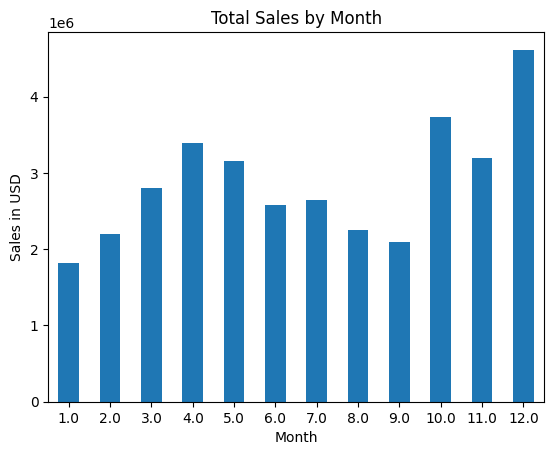

In [17]:
import matplotlib.pyplot as plt

month_sales = df.groupby('Month')['Sales'].sum()
month_sales.plot(kind='bar')
plt.xticks(rotation='horizontal')
plt.ylabel('Sales in USD')
plt.xlabel('Month')
plt.title('Total Sales by Month')
plt.show()

*Figure 3: Total Sales By Month*

The sales data over the period from **January to December** reveals notable trends in overall sales performance showing **a steady increase in sales** over the year with several **seasonal spikes** in specific months. This pattern suggests growing customer engagement and effective sales strategies, especially during peak periods.

**Monthly Highlights** Certain months stand out for their impact on sales performance:

-   **December** recorded the **highest sales volume**, likely due to the holiday season and year-end promotions, capturing increased consumer spending.

-   **October** saw a significant boost, possibly driven by a targeted sale program or promotion.

-   April to November showed a gradual decline, indicating a stabilization in demand. This may suggest a shift from high initial interest and purchases to more spontaneous or needs-based buying, as customers adjusted after initial seasonal spikes.

**Key Observations**

-   **Peak Sales in December:** The highest sales in December highlights a successful capitalizing on holiday shopping trends. This aligns with typical consumer behavior during this time, where year-end promotions boost spending.
-   **October Sale Spike:** A strong increase in October suggests that promotions were effective, attracting consumers looking for discounts ahead of a main season in year.
-   **Lower Mid-year Sales** The dip in sales from mid-year could indicate a reduction in consumer spending after an initial surge in the first quarter. This may reflect a natural leveling off, as the early months often see heightened consumer enthusiasm, which tapers as customers become more selective or budget-conscious later in the year.

### b/ **What city sold the most product?**

For cities, we could focus on deciding group of 'Sales' by 'Cities'. This analysis could present the sales values and its performance through city.

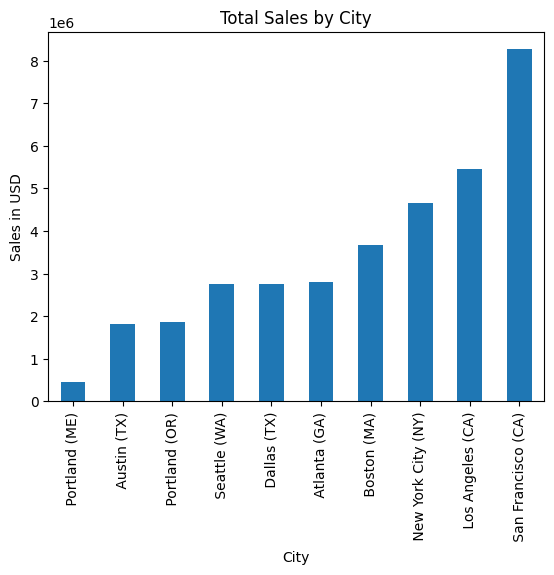

In [18]:
city_sales = df.groupby('City')['Sales'].sum().sort_values()
city_sales.plot(kind='bar')
plt.xticks(rotation='vertical')
plt.ylabel('Sales in USD')
plt.xlabel('City')
plt.title('Total Sales by City')
plt.show()

*Figure 4: Total Sales By City*

**City Comparisons (Sales By City)**
Analyzing the sales data across different cities reveals significant variations in performance. By grouping the data by 'City' and calculating the total sales, we can compare the sales volume to identify the highest and lowest performers.